# Setup

## Imports 

In [228]:
# Standard
import sys
from cycler import cycler
# Third party
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import proplot as plot
# Local                                                                        
sys.path.append('/Users/46h/Research/code/accphys/') 
from tools import (
    envelope_analysis as ea,
    plotting as myplt,
    utils
)

## Settings

In [229]:
# Plotting
plot.rc['figure.facecolor'] = 'white'
plot.rc['cycle'] = 'default'
plot.rc['style'] = None # https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
plot.rc['savefig.dpi'] = 'figure' # proplot default is 1200, which makes inline animations appear huge
dpi = 500

# Load data

In [230]:
positions = np.load('_output/data/positions.npy')

tracked_params_lists = {}
tracked_params_lists['tbt'] = np.load('_output/data/tbt_params_list.npy')
tracked_params_lists['sdep'] = np.load('_output/data/sdep_params_list.npy')

stats_lists = {}
for key in ('tbt', 'sdep'):
    stats_lists[key] = []
    for tracked_params in tracked_params_lists[key]:
        stats = ea.Stats(mode=1)
        stats.read_env(tracked_params)
        if key == 'sdep':
            for df in stats.dfs():
                df['s'] = positions
                df['s/L'] = positions / positions[-1]
        stats_lists[key].append(stats)
    stats_lists[key] = np.array(stats_lists[key])

# Plot 

In [231]:
plt_kws = dict(lw=None, marker=None, markersize=None, legend=False)
cmap = plot.Colormap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(stats_list))]
_cycler = cycler('color', colors)

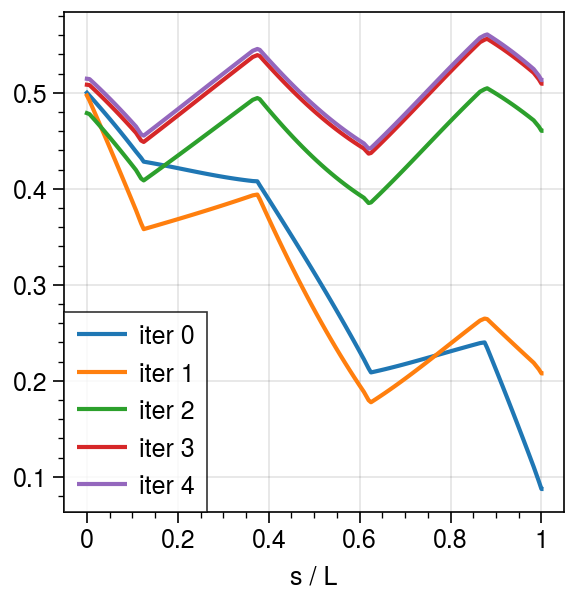

In [247]:
nshow = 5
fig, ax = plot.subplots()
for stats in stats_lists['sdep'][:nshow]:
    stats.twiss4D[['s/L','u']].plot('s/L', ax=ax, **plt_kws)
ax.legend(labels=['iter {}'.format(i) for i in range(nshow)], ncols=1)
ax.format(xlabel='s / L')

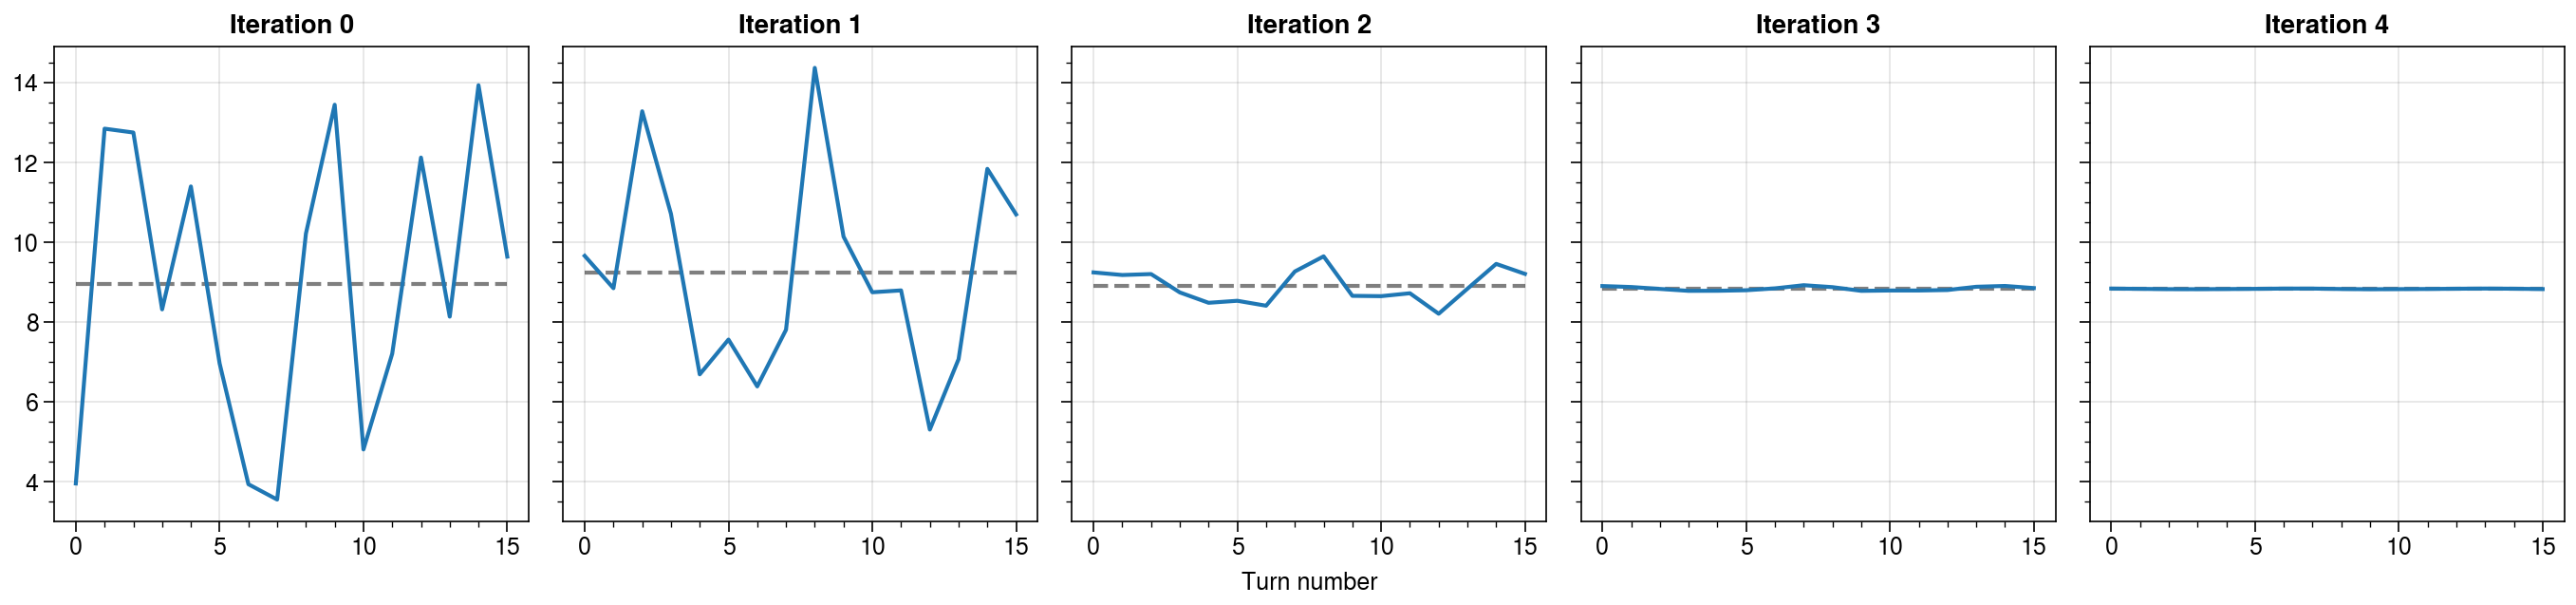

In [242]:
nshow = 5

fig, axes = plot.subplots(ncols=nshow)
for ax, stats in zip(axes, stats_lists['tbt'][:nshow]):    
    vals = stats.twiss4D['bx'].values
    mean = np.mean(vals)
    n = vals.shape[0]
    ax.plot(list(range(n)), vals)
    ax.plot(list(range(n)), n * [mean], '--', color='k', alpha=0.5, zorder=0)
    
axes.format(xlabel='Turn number', 
#             ylabel=r'$\sqrt{\langle{x^2}\rangle}$', 
            toplabels=['Iteration {}'.format(i) for i in range(nshow)])